## Feature extraction

This documents show how to extract important timeseries charcterstics from raster files.

In [1]:
import os.path
from osgeo import gdal  # changed from 'import gdal'

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
import tsraster.prep as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features_to_array

connect to the data directory

In [2]:
path = "../docs/img/temperature/"

read the images and convert the arrays to a time-series dataframe 

In [3]:
rasters = tr.image_to_series(path)

/home/mmann1123/miniconda3/envs/ts-fresh/lib/python3.8/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Lets take a look at the time-series data

In [4]:
rasters.head(10)

pixel_id    time         value kind
0         0  200501 -3.402823e+38  tmx
1         0  200502 -3.402823e+38  tmx
2         0  200503 -3.402823e+38  tmx
3         0  200601 -3.402823e+38  tmx
4         0  200602 -3.402823e+38  tmx
5         0  200603 -3.402823e+38  tmx
6         0  200701 -3.402823e+38  tmx
7         0  200702 -3.402823e+38  tmx
8         0  200703 -3.402823e+38  tmx
9         1  200501 -3.402823e+38  tmx

Accordingly, each pixel is identified by *id*. Since there are 9 bands (3 images per year), **tsraster** assigns each 9 first pixels the id number 1 and differentiate each by their respective year and month. Hence, the *time* column organizes and orders pixels by time. The *value* column represent the pixel value

We can summerize the data and examine its pattern.

In [5]:
rasters.describe()

pixel_id         value
count  8.789760e+06  8.789760e+06
mean   4.883195e+05          -inf
std    2.819317e+05           inf
min    0.000000e+00 -3.402823e+38
25%    2.441598e+05 -3.402823e+38
50%    4.883195e+05 -3.402823e+38
75%    7.324792e+05  1.343750e+01
max    9.766390e+05  4.900000e+01

Let's go ahead and extract features

In [ ]:
fc_parameters = {
    "mean": None,
    "maximum": None,
    "minimum":None,
    # example: pass multiple calls 
    "quantile":[{"q": 0.15}, {"q": 0.95}]
}


ts_features = calculateFeatures(path,
                                parameters=fc_parameters, 
                                reset_df=True)

The feature extraction swift through all bands and calculate values such maximum, minimum and mean, median. 
In this instance, 4 features of temprature data are generated for 9 rasters representing 3 months of 3 years of data.

Let's take a look at the summary of these features.

In [ ]:
ts_features.describe()

tmx-value__maximum  tmx-value__mean  tmx-value__minimum  \
count       976640.000000    976640.000000       976640.000000   
mean            12.073717         6.963103            3.600137   
std             16.483459         9.731706            5.542686   
min              0.000000        -0.333333           -7.000000   
25%              0.000000         0.000000            0.000000   
50%              0.000000         0.000000            0.000000   
75%             31.000000        17.222222            8.000000   
max             49.000000        30.666667           20.000000   

       tmx-value__quantile__q_0.15  tmx-value__quantile__q_0.95  
count                976640.000000                976640.000000  
mean                      4.068339                    11.664085  
std                       6.089460                    15.943853  
min                      -6.000000                     0.000000  
25%                       0.000000                     0.000000  
50%                       0.000000                     0.000000  
75%                       9.200000                    29.800000  
max                      20.200000                    47.800000

Next, convert these features to array, visualize or create a tiff

In [ ]:
# first, get the original dimension/shape of image 
og_rasters = tr.image_to_array(path)
rows, cols, nums = og_rasters.shape


# convert df to matrix array
matrix_features = ts_features.values
num_of_layers = matrix_features.shape[1]


f2Array = matrix_features.reshape(rows, cols, num_of_layers)
print(f2Array.shape)


(1120, 872, 5)


visualize features

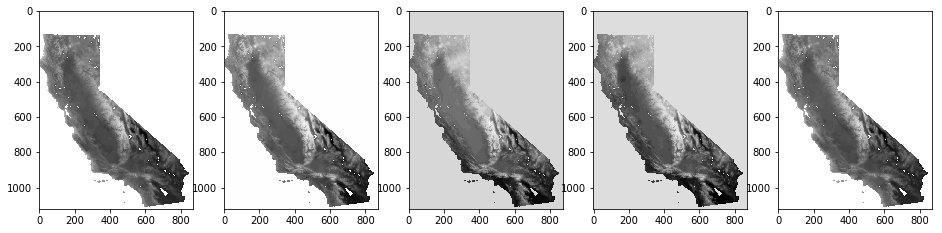

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(16,10))

for i in range(0,f2Array.shape[2]):
    img = f2Array[:,:,i]
    i = i+1
    plt.subplot(1,5,i)
    plt.imshow(img, cmap="Greys")
